In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('Data_Lamudi_Cleaned.csv')

# Fitur (X) dan target (y)
fitur = ['Kamar Tidur', 'Kamar Mandi', 'Luas Bangunan', 'Luas Tanah']
X = df[fitur]
y = df['Harga']


# Membuat model

## Linear Regression, Random Forest, XGBoost

In [69]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur (hanya untuk Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definisikan model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}


In [70]:
# Training & Evaluasi
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Gunakan fitur yang sudah distandardisasi hanya untuk Linear Regression
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R2": r2}


Training Linear Regression...

Training Random Forest...

Training XGBoost...


In [71]:
# Tampilkan hasil evaluasi
print("\n--- Evaluasi Model ---")
for name, res in results.items():
    print(f"{name} - RMSE: {res['RMSE']:.2f}, R2: {res['R2']:.4f}")


--- Evaluasi Model ---
Linear Regression - RMSE: 584409864.50, R2: 0.7485
Random Forest - RMSE: 726208194.12, R2: 0.6116
XGBoost - RMSE: 833833423.18, R2: 0.4879


## Neural Network (Tensorflow)

In [72]:
import seaborn as sns
import tensorflow as tf

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Tambah kompleksitas model dan dropout
def build_nn_improved(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')
    return model

model = build_nn_improved(X_train_scaled.shape[1])

early_stop = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train_scaled, y_train_log,
    validation_split=0.3,
    epochs=500,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

y_pred_log = model.predict(X_test_scaled).flatten()
y_pred = np.expm1(y_pred_log)

nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
nn_r2 = r2_score(y_test, y_pred)
results["NN (Tensorflow)"] = {"RMSE": rmse, "R2": r2}
print(f"Neural Network - RMSE: {rmse:.2f}, R2: {r2:.4f}")


d:\Koding\Laskar AI\Laskar_AI_CapstonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 445.3582 - val_loss: 443.7501 - learning_rate: 1.0000e-04
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 440.1816 - val_loss: 439.6168 - learning_rate: 1.0000e-04
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 436.2153 - val_loss: 435.3862 - learning_rate: 1.0000e-04
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 431.5794 - val_loss: 430.9203 - learning_rate: 1.0000e-04
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 426.8196 - val_loss: 426.0940 - learning_rate: 1.0000e-04
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 421.4251 - val_loss: 420.7545 - learning_rate: 1.0000e-04
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 415.2963 - val_loss: 414.8084 - learning_rate: 1.0000e-04
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 409.6981 - val_loss: 408.0827 - learning_rate: 1.0000e-04
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - lo

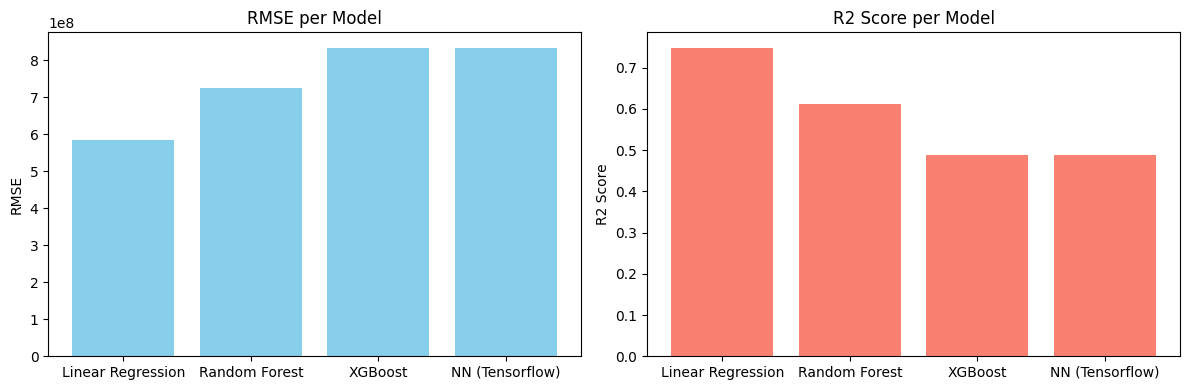

In [74]:
# Visualisasi perbandingan
labels = list(results.keys())
rmse_values = [res["RMSE"] for res in results.values()]
r2_values = [res["R2"] for res in results.values()]

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(labels, rmse_values, color='skyblue')
plt.title("RMSE per Model")
plt.ylabel("RMSE")

plt.subplot(1, 2, 2)
plt.bar(labels, r2_values, color='salmon')
plt.title("R2 Score per Model")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()